In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
par_rag = 0.999

<center>

# <span style="color:blue;"> Dimensioni dei dischi </span>

<center>

Per la seguente analisi ho preso in considerazione il disco circum-secondario in un sistema con un rapporto di masse stellari 1:3. I parametri adimensionali $\alpha$ presi in considerazione sono:
$$\alpha \in \{1\cdot 10^{-4},\,5\cdot 10^{-4},\,1\cdot 10^{-3},\,5 \cdot 10^{-3},\,1 \cdot 10^{-2}\}$$
I rispettivi aspect-ratio sono:
$$\frac{h}{r}\in\{0.15811,\,0.07071,\,0.05,\,0.02236,\,0.01581\}$$ 

### Output finali

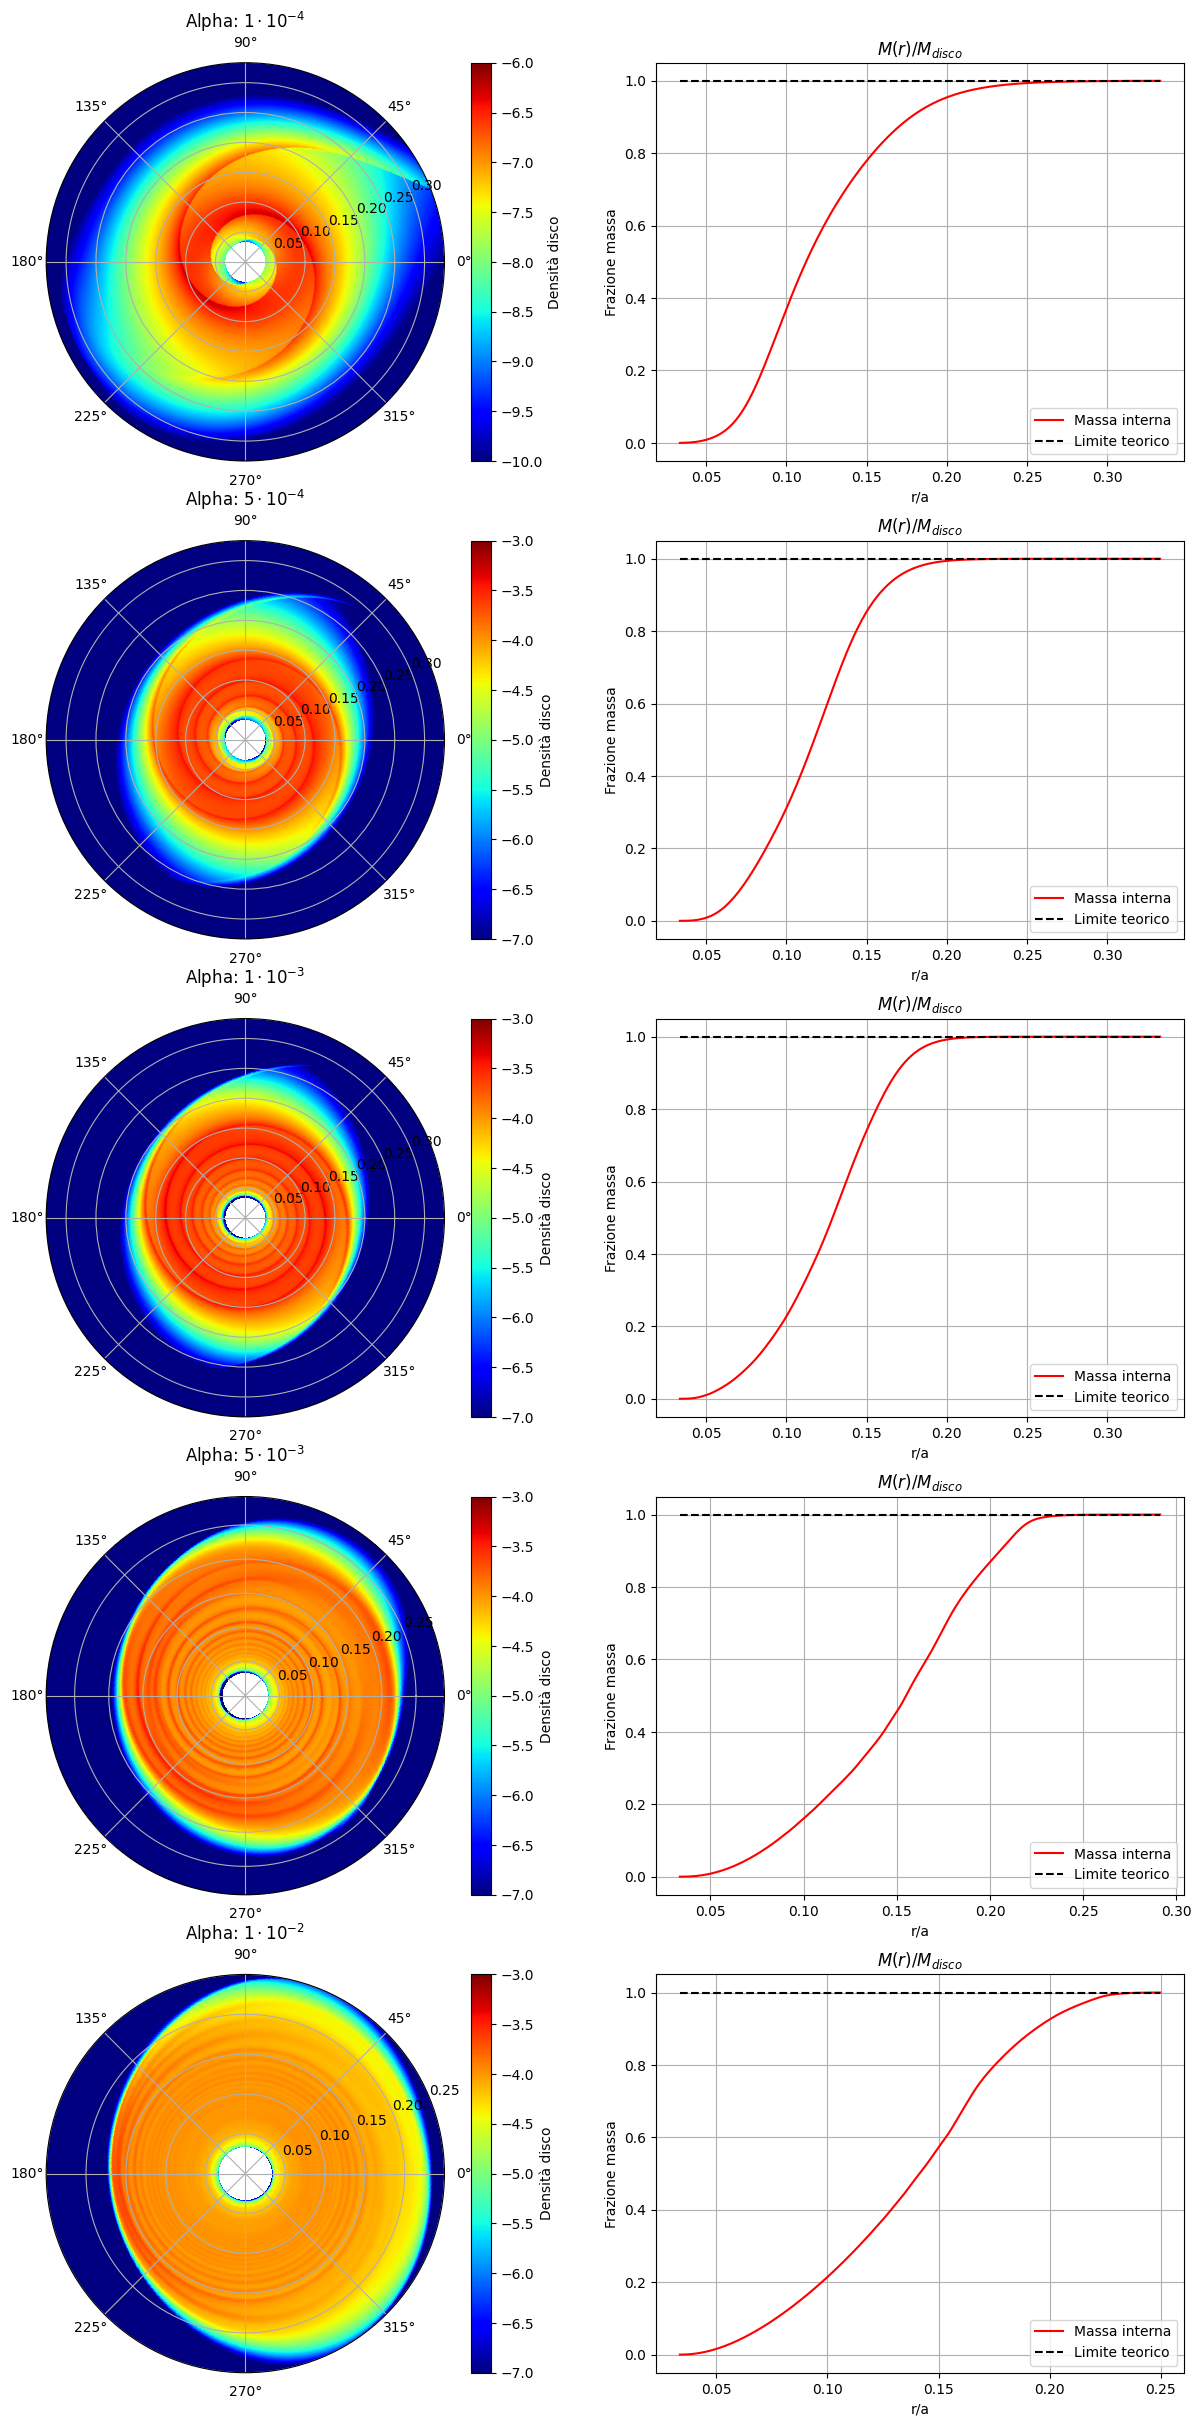

In [4]:
dim = np.array([4.0, 4.0, 4.0, 3.5, 3.0])
dist = np.array([12, 12, 12, 12, 12])

cart = np.array(['Al1_4', 'Al5_4', 'Al1_3', 'Al5_3', 'Al1_2'])
tit = np.array([r'$1\cdot 10^{-4}$', r'$5\cdot 10^{-4}$', r'$1\cdot 10^{-3}$', r'$5\cdot 10^{-3}$', r'$1\cdot 10^{-2}$'])

liminf = np.array([-10, -7, -7, -7, -7])
limsup = np.array([-6, -3, -3, -3, -3])


# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 6 * len(cart)))
#Contenitore per la massa progressiva
m_prog = np.zeros((len(cart), 384))

for i in range(0, len(cart)):

    #Valori assunti dalla densità
    rho = np.fromfile(cart[i] + '/gasdens100.dat').reshape(384, 1152)

    for j in range(0, 2):

        #----------------------------------#
        #          Creo la griglia          #
        #-----------------------------------#

        # Creare una griglia di valori R e Theta
        theta = np.linspace(-np.pi, np.pi, 1152)
        #Creo coordinata radiale corretta
        r = np.linspace(0.4/dist[i], dim[i]/dist[i], 385)
        r_plot = np.zeros(384)
        for k in range(0, len(r_plot)):
            r_plot[k] = (r[k+1] - r[k])/2 + r[k]
        #Creo la griglia
        Theta, R = np.meshgrid(theta, r_plot)

        if (2*i + j)%2 == 0:
            ax = fig.add_subplot(len(cart), 2, 2*i + j+1, projection='polar')
            #-----------------------------------#
            #      Disegno grafico polare       #
            #-----------------------------------#

            #Disegnare il grafico polare
            cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = liminf[i], vmax = limsup[i])
            plt.colorbar(cax, label='Densità disco')
            ax.set_rmin(0)
            ax.set_rmax(dim[i]/dist[i])
            ax.set_title(r'Alpha: ' + tit[i])

        else:
            ax = fig.add_subplot(len(cart), 2, 2*i + j+1)
            raggio = 0

            #---------------------------------#
            #        Calcolo la massa         #
            #---------------------------------#
            for k in range(0,384):
                if k != 0:
                    m_prog[i, k] = m_prog[i, k-1]
                #Calcolo area della singola sezione
                area = np.pi * (pow(r[k+1],2)-pow(r[k],2))
                area = area/1152

                for h in range(0, 1152):
                    m_prog[i, k] += area * rho[k, h]
            
            ax.plot(r_plot, m_prog[i]/m_prog[i, 383], color = 'red', label = 'Massa interna')
            ax.plot(r_plot, m_prog[i]/m_prog[i] * 0.999, color = 'black', linestyle = '--', label = 'Limite teorico')
            ax.set_title(r'$M\left(r\right)/M_{disco}$')
            ax.set_xlabel(r'r/a')
            ax.set_ylabel('Frazione massa')
            ax.legend(loc='best')
            ax.grid(True)
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

### Dimensioni dei dischi

In [5]:
num = np.array([41, 41, 41, 41, 41])
dim = np.array([4.0, 4.0, 4.0, 3.5, 3.0])
dist = np.array([12, 12, 12, 12, 12])
r_disco = np.zeros(len(cart))

cart = np.array(['Al1_4', 'Al5_4', 'Al1_3', 'Al5_3', 'Al1_2'])
tit = np.array([r'$1\cdot 10^{-4}$', r'$5\cdot 10^{-4}$', r'$1\cdot 10^{-3}$', r'$5\cdot 10^{-3}$', r'$1\cdot 10^{-2}$'])

for h in range(0, len(cart)):
    rag = np.zeros(num[h])

    #Determino i raggi corretti
    r = np.linspace(0.4, dim[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] - r[i])/2 + r[i]

    for k in range(0, num[h]):
        #Importo la densità considerata
        rho = np.fromfile(cart[h] + "/gasdens" + str(60+k) + ".dat").reshape(384, 1152)
        massa = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                massa += area * rho[i, j]

        #Controllo ora dove ottengo il 90% della massa
        appo = 0
        raggio = 0

        for i in range(0,384):
            #Calcolo area della singola sezione
            area = np.pi * (pow(r[i+1],2)-pow(r[i],2))
            area = area/1152

            for j in range(0, 1152):
                appo += area * rho[i, j]
    
            if appo >= par_rag*massa:
                rag[k] = r_plot[i]
                break

    med = 0
    for i in range(0, len(rag)):
        med += rag[i]

    r_disco[h] = round(med/len(rag)/dist[h], 3)
    print('Il raggio di troncamento del disco con ' + cart[h] + ' è pari a: ' + str(round(med/len(rag)/dist[h], 3)) + r' a')

Il raggio di troncamento del disco con Al1_4 è pari a: 0.289 a
Il raggio di troncamento del disco con Al5_4 è pari a: 0.224 a
Il raggio di troncamento del disco con Al1_3 è pari a: 0.222 a
Il raggio di troncamento del disco con Al5_3 è pari a: 0.229 a
Il raggio di troncamento del disco con Al1_2 è pari a: 0.235 a


### Dipendenza dai parametri

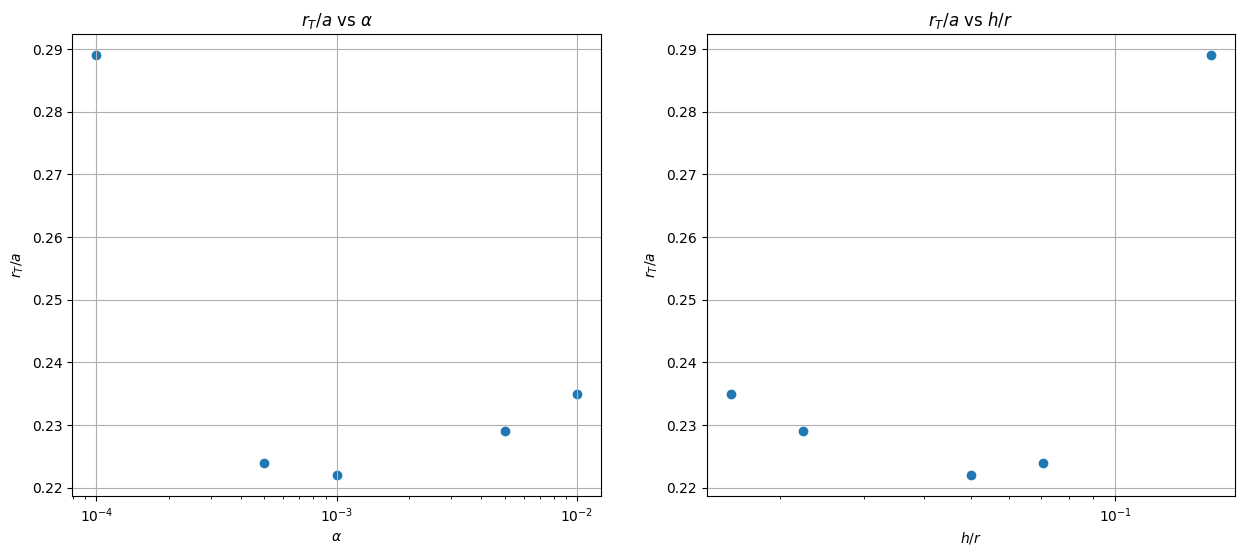

In [8]:
fig = plt.figure(figsize = (15, 6))

ax0 = fig.add_subplot(1, 2, 1)

x = np.array([1e-4, 5e-4, 1e-3, 5e-3, 1e-2])
ax0.scatter(x, r_disco)
ax0.set_xscale('log')

ax0.set_ylabel(r'$r_T/a$')
ax0.set_xlabel(r'$\alpha$')
ax0.set_title(r'$r_T/a$ vs $\alpha$')
ax0.grid(True)


ax1 = fig.add_subplot(1, 2, 2)

x = np.array([0.15811, 0.07071, 0.05, 0.02236, 0.01581])
ax1.scatter(x, r_disco)
ax1.set_xscale('log')

ax1.set_ylabel(r'$r_T/a$')
ax1.set_xlabel(r'$h/r$')
ax1.set_title(r'$r_T/a$ vs $h/r$')
ax1.grid(True)




plt.show()

Considero quanto accade valutando entrambi i parametri contemporaneamente.

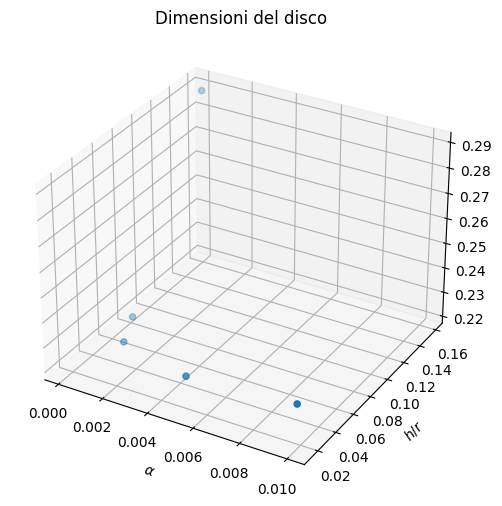

In [9]:
# Dati di esempio
x = np.array([1e-4, 5e-4, 1e-3, 5e-3, 1e-2])
y = np.array([0.15811, 0.07071, 0.05, 0.02236, 0.01581])
Z = r_disco

# Creazione del grafico
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plottaggio
ax.scatter(x, y, Z)

#Titoli
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$h/r$')
ax.set_title('Dimensioni del disco')

# Mostra il grafico
plt.show()
